In [63]:
# oimization ideas:
# 	* find the furthest red pixels up down left right and do the rolling window only there to find if there is a sign
# 	* don't check for every single pixel in shape, rather choose a relevant number of pixels to check and only check that many (
# 		- eg: check every other pixel for a 200 by 200 pixel sign
#       - do a maximum of 1% culling and show at max one at every 10 px on OX and one in every 10 on OY. Balance the values to be 3:2 instead of 6:1


# current best strategy:   
#   * find all red chunks in immage
#   * think of every chunk as a give way sign with:
#       - side starting in the top left highest red pixel and ending in the top right red pixel
#       - and height startign in the lowest red piexel and ending in the perpendicular highest red pixel above
#   * account for rotation and for squishing in the immage
#   * try to get width of the red triangle in pixels and adjust in the funciton


# bugs:
#   * make triangle rotate
#   * make height not affect red side bars?
	

In [64]:
import os
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import image as mpimg
from dataclasses import dataclass

In [65]:
DATA_DIR = "./my-dataset"
GIVE_WAY_DIR = os.path.join(DATA_DIR, "give-way")

RED_PX = 0
GREEN_PX = 1
BLUE_PX = 2

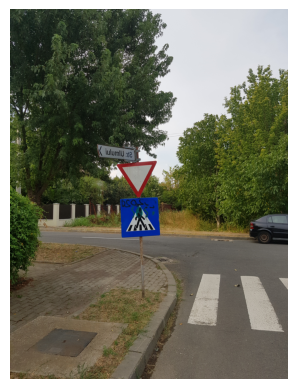

In [66]:
# print a picture

gw_images = []
for img_name in sorted(os.listdir(GIVE_WAY_DIR)):
    gw_images.append(np.transpose(mpimg.imread(os.path.join(GIVE_WAY_DIR, img_name)), (1, 0, 2)))
    
test_img = gw_images[7]

plt.imshow(test_img)
plt.axis('off')
plt.show()

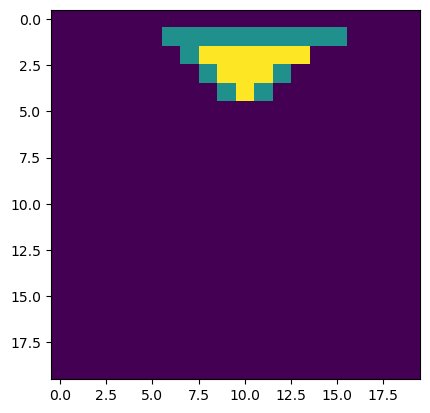

In [67]:
# draw a black and white give way sign of arbitrary size, only draw a portion of the pixels

def between(p_val, p_lower, p_higher):
    return p_val <= p_higher and p_val >= p_lower

def drawSign(p_mat, p_x_start, p_y_start, p_side, p_height = -1):
    height_factor = 1

    if p_height != -1:
        equilateral_height = int(np.sqrt(3 * p_side * p_side /4))
        height_factor = p_height / equilateral_height

    red_tiangle_height = int(np.sqrt(3 * p_side * p_side /4) * height_factor) 
    converging_factor = 2 / np.sqrt(3) / height_factor # math :)

    shape_area = red_tiangle_height * p_side / 2
    pixels_to_check = 1 * shape_area

    px_culling_rate = 1

    if shape_area > pixels_to_check:
        px_culling_rate =  pixels_to_check / shape_area 
        
    red_triangle_width_percent = 0.7
    white_side = int(p_side * red_triangle_width_percent)

    white_x_start = p_x_start + int((p_side - white_side) / 2) 
    white_y_start = p_y_start + int((p_side - white_side) * np.sqrt(3) / 6)
    
    white_triangle_height = int(np.sqrt(3 * white_side * white_side / 4) * height_factor)

    for i in range(p_x_start, p_x_start + red_tiangle_height):
        for j in range(int(p_y_start + ((i - p_x_start)/2) * converging_factor), int(p_y_start + p_side - (i - p_x_start) / 2 * converging_factor)):
            if(np.random.rand() <= px_culling_rate):
                if between(i, 
                    white_x_start - (p_side - white_side) * np.sqrt(3) / 12,
                    white_x_start + white_triangle_height)\
                and between(j, 
                    white_y_start + (p_side - white_side) * np.sqrt(3) / 4 + ((i - white_x_start) / 2) * converging_factor, 
                    white_y_start + white_side - (i - white_x_start) / 2 * converging_factor):
                    
                    p_mat[i][j] = 20
                else:
                    p_mat[i][j] = 10

matrix = np.zeros((20, 20))
drawSign(matrix, 1, 6, 10, 4)
plt.imshow(matrix)

# matrix = np.zeros((200, 200))
# drawSign(matrix, 30, 10, 70)
# plt.imshow(matrix)

# matrix = np.zeros((1000, 1000))
# drawSign(matrix, 10, 400, 600)
# plt.imshow(matrix)

[31 50 31]


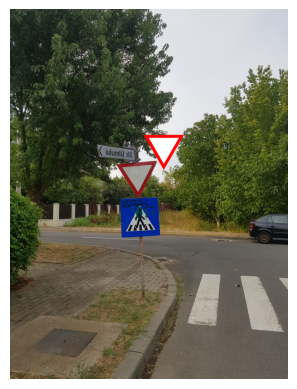

In [68]:
# print a generated give way sign on a immage
def drawRgbSign(p_mat, p_x_start, p_y_start, p_side, p_height = -1):
	height_factor = 1

	if p_height != -1:
		equilateral_height = int(np.sqrt(3 * p_side * p_side /4))
		height_factor = p_height / equilateral_height

	red_tiangle_height = int(np.sqrt(3 * p_side * p_side /4) * height_factor)
	converging_factor = 2 / np.sqrt(3) / height_factor # math :)

	shape_area = red_tiangle_height * p_side / 2
	pixels_to_check = shape_area

	px_culling_rate = 1

	if shape_area > pixels_to_check:
		px_culling_rate =  pixels_to_check / shape_area 
		
	red_triangle_width_percent = 0.8
	white_side = int(p_side * red_triangle_width_percent)

	white_x_start = p_x_start + int((p_side - white_side) / 2) 
	white_y_start = p_y_start + int((p_side - white_side) * np.sqrt(3) / 6)
	
	white_triangle_height = int(np.sqrt(3 * white_side * white_side / 4)) * height_factor

	for i in range(p_x_start, p_x_start + red_tiangle_height):
		for j in range(int(p_y_start + ((i - p_x_start)/2) * converging_factor), int(p_y_start + p_side - (i - p_x_start) / 2 * converging_factor)):
			if(np.random.rand() <= px_culling_rate):
				if between(i, 
					white_x_start - (p_side - white_side) * np.sqrt(3) / 12,
					white_x_start + white_triangle_height)\
				and between(j, 
					white_y_start + (p_side - white_side) * np.sqrt(3) / 4 + ((i - white_x_start) / 2) * converging_factor, 
					white_y_start + white_side - (i - white_x_start) / 2 * converging_factor):
					
					for pixel in range(0, 3):
						p_mat[i][j][pixel] = 255
				else:
					p_mat[i][j][RED_PX] = 255
					p_mat[i][j][GREEN_PX] = 0
					p_mat[i][j][BLUE_PX] = 0

np.shape(test_img)
len(test_img[0])
print(test_img[0][0])
img = test_img.copy()

drawRgbSign(img, 1372, 1453, 440)

plt.imshow(img)
plt.axis('off')
plt.show()

[31 50 31]


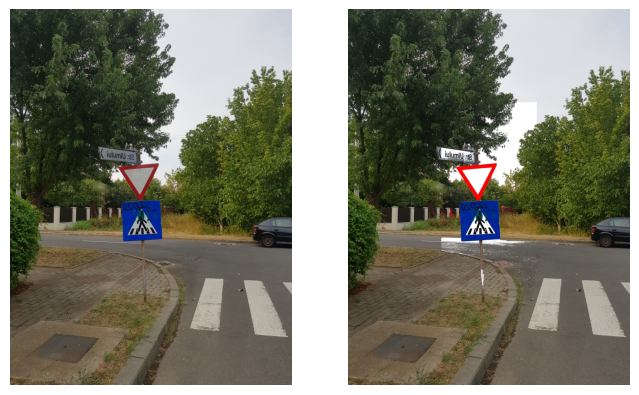

In [69]:
# find treshold values in order to correctly identify white and red

def is_red(p_matrix_px):
    return (int(p_matrix_px[RED_PX]) > 2 * int(p_matrix_px[GREEN_PX]) and int(p_matrix_px[RED_PX]) > 2 * int(p_matrix_px[BLUE_PX]))

def is_white(p_matrix_px):
    pixel_RGB_variance = 20
    minimum_red_brightness = 110

    return  (int(p_matrix_px[RED_PX]) + pixel_RGB_variance > int(p_matrix_px[GREEN_PX]) and\
            int(p_matrix_px[RED_PX]) - pixel_RGB_variance < int(p_matrix_px[GREEN_PX]) and\
            int(p_matrix_px[RED_PX]) + pixel_RGB_variance > int(p_matrix_px[BLUE_PX]) and\
            int(p_matrix_px[RED_PX]) - pixel_RGB_variance < int(p_matrix_px[BLUE_PX]) and\
            p_matrix_px[RED_PX] > minimum_red_brightness)

def check_red(p_img):
    trim = 1000

    for i in range(trim, len(p_img) - trim):
        for j in range(trim, len(p_img[0]) - trim):
            if is_red(p_img[i][j]):
                p_img[i][j][RED_PX] = 255
                p_img[i][j][GREEN_PX] = 0
                p_img[i][j][BLUE_PX] = 0

            if is_white(p_img[i][j]): 
                p_img[i][j][RED_PX] = 255
                p_img[i][j][GREEN_PX] = 255 
                p_img[i][j][BLUE_PX] = 255 

np.shape(test_img)
len(test_img[0])
print(test_img[0][0])
img = test_img.copy()

check_red(img)

plt.figure(figsize=(8, 5))
plt.subplot(1, 2, 1)
plt.axis('off')
plt.imshow(test_img)

plt.subplot(1, 2, 2)
plt.imshow(img)
plt.axis('off')
plt.show()

[31 50 31]


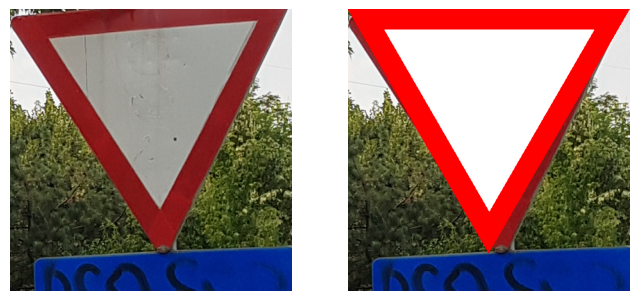

0.8934621808637556


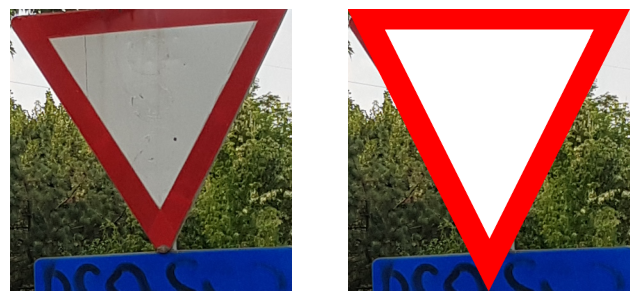

0.7735743801652892


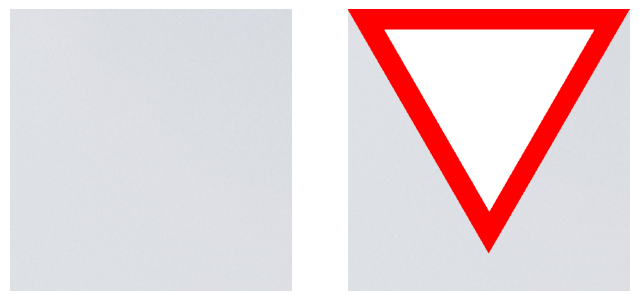

0.556907659269864


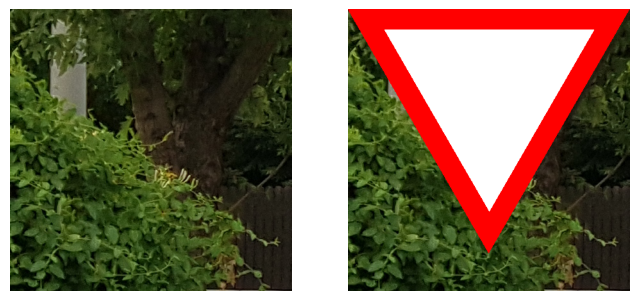

0.009782868050584585


In [70]:
# funciton used to score how close a triangle of side p_side starting at x and y resemples a give way sign

def check_for_sign(p_img, p_x_start, p_y_start, p_side, p_height = -1):
	# the difference between the RGB pixels in order for it to be considered white
	color_score = 0

	height_factor = 1
	
	if p_height != -1:
		equilateral_height = int(np.sqrt(3 * p_side * p_side /4))
		height_factor = p_height / equilateral_height

	red_tiangle_height = int(np.sqrt(3 * p_side * p_side /4) * height_factor)
	converging_factor = 2 / np.sqrt(3) / height_factor # math :)

	shape_area = red_tiangle_height * p_side / 2
	pixels_to_check = 100/100 * shape_area

	px_culling_rate = 1

	if shape_area > pixels_to_check:
		px_culling_rate =  pixels_to_check / shape_area 
		
	red_triangle_width_percent = 0.8
	white_side = int(p_side * red_triangle_width_percent)

	white_y_start = p_y_start + int((p_side - white_side) / 2) 
	white_x_start = p_x_start + int((p_side - white_side) * np.sqrt(3) / 6)
	
	white_triangle_height = int(np.sqrt(3 * white_side * white_side / 4) * height_factor)

	for i in range(p_y_start, p_y_start + red_tiangle_height):
		for j in range(int(p_x_start + ((i - p_y_start)/2) * converging_factor), int(p_x_start + p_side - (i - p_y_start) / 2 * converging_factor)):
			if(np.random.rand() <= px_culling_rate):
				if between(i, 
					white_y_start - (p_side - white_side) * np.sqrt(3) / 12,
					white_y_start + white_triangle_height)\
				and between(j, 
					white_x_start + (p_side - white_side) * np.sqrt(3) / 4 + ((i - white_y_start) / 2) * converging_factor, 
					white_x_start + white_side - (i - white_y_start) / 2 * converging_factor):
					
					if is_white(p_img[i][j]):
						color_score += 1
				else:
					if is_red(p_img[i][j]):
						color_score += 1

	plt.figure(figsize=(8, 4))
	plt.subplot(1, 2, 1)
	plt.axis('off')
	plt.imshow(p_img[p_y_start:p_y_start+p_side, p_x_start:p_x_start+p_side])
	
	ideal_sign = p_img[p_y_start:p_y_start+p_side, p_x_start:p_x_start+p_side].copy() 

	drawRgbSign(ideal_sign, 0, 0, p_side, red_tiangle_height)
	plt.subplot(1, 2, 2)
	plt.axis('off')
	plt.imshow(ideal_sign)

	plt.show()

	return  color_score / pixels_to_check

# def print_selected_shape(img, p_x_start, p_y_start, p_side):
# 	mat_to_print = np.zeros((p_side, p_side, 3))
# 	plt.imshow(mat_to_print)
# 	plt.show()
# 	for i in range(0, p_side):
# 		for j in range(0, p_side):
# 			for px in range(0, 3):
# 				mat_to_print[i][j][px] = img[p_x_start + i][p_y_start + j][px]
	
# 	plt.imshow(mat_to_print)
# 	plt.show()

np.shape(test_img)
len(test_img[0])
print(test_img[0][0])
img = test_img.copy()

# drawRgbSign(imgu, 0, 1853, 440)
x_val = 1160
y_val = 1680
side = 440

good_score = check_for_sign(test_img, x_val, y_val, side)
print(good_score)

good_score = check_for_sign(test_img, x_val, y_val, side, side)
print(good_score)

bad_score = check_for_sign(test_img, 1853, 0, 440)
print(bad_score)

bad_score = check_for_sign(test_img, 0, 1853, 440)
print(bad_score)




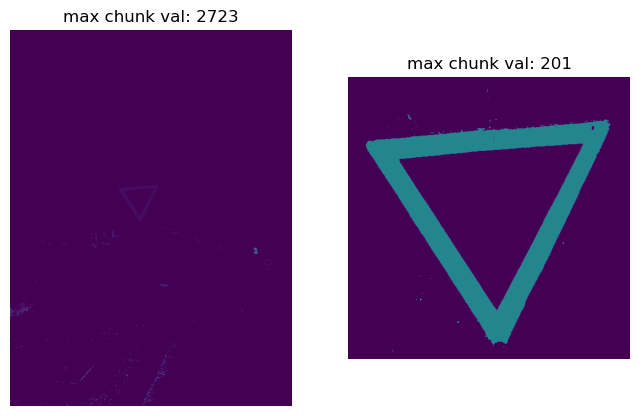

In [71]:
# find red chunks and separate them by labling

import sys
sys.setrecursionlimit(200000)  # Increase limit as needed

def fill_in_shape_recursive(p_img, p_label_mat, p_label, p_x, p_y):
    if p_x >= len(p_img) - 1 or p_y >= len(p_img[0]) - 1 or p_x <= 1 or p_y <= 1:
        return

    p_label_mat[p_x][p_y] = p_label
    for i in range(-1, 2):
        for j in range(-1, 2):
            if is_red(p_img[p_x + i][p_y + j]) and p_label_mat[p_x + i][p_y + j] == 0:
                fill_in_shape_recursive(p_img, p_label_mat, p_label, p_x + i, p_y + j)

def fill_in_shape(p_img, p_label_mat, p_label, p_x, p_y):
    p_fronteer = np.array([]) 

    p_fronteer = np.append(p_fronteer, p_x)
    p_fronteer = np.append(p_fronteer, p_y)

    current_node = 0

    while current_node < len(p_fronteer):
        curr_x = int(p_fronteer[current_node])
        curr_y = int(p_fronteer[current_node + 1])

        if not(int(p_fronteer[current_node]) >= len(p_img) - 1 or int(p_fronteer[current_node + 1]) >= len(p_img[0]) - 1 or int(p_fronteer[current_node]) <= 1 or int(p_fronteer[current_node + 1]) <= 1):
            p_label_mat[curr_x][curr_y] = p_label
            for i in range(-1, 2):
                for j in range(-1, 2):
                    if is_red(p_img[curr_x + i][curr_y  + j]) and p_label_mat[curr_x + i][curr_y + j] == 0:
                        p_label_mat[curr_x + i][curr_y + j] = p_label

                        p_fronteer = np.append(p_fronteer, curr_x + i)
                        p_fronteer = np.append(p_fronteer, curr_y + j)

        current_node += 2 


def label_red_chunks(p_img):
    label_mat = np.zeros((len(p_img), len(p_img[0])))
    current_label = 1

    for i in range(1, len(p_img) - 2):
        for j in range(1, len(p_img[0]) - 2):
            if is_red(p_img[i][j]) and label_mat[i][j] == 0:
                fill_in_shape(p_img, label_mat, current_label, i, j)
                current_label += 1
               
               
    return label_mat


labeled_img = label_red_chunks(test_img)
plt.figure(figsize=(8, 5))
plt.subplot(1, 2, 1)
plt.axis("off")
plt.imshow(labeled_img)
plt.title("max chunk val: " + str(int(np.max(labeled_img))))

plt.subplot(1, 2, 2)
x_val = 1580
y_val = 1130
side = 500 

plt.imshow(labeled_img[x_val:x_val+side, y_val:y_val+side])
plt.title("max chunk val: " + str(int(np.max(labeled_img[x_val:x_val+side, y_val:y_val+side]))))

plt.axis("off")
plt.show()



In [76]:
# clasify each chunk as large enough to be a sign or not
@dataclass
class point:
    x: int
    y: int

@dataclass 
class give_way_chunk:
    top_left_point:  point
    top_right_point: point 
    bottom_point:    point
    side_length:     int
    height_length:   int

def get_chunk_coords(p_label_img, label):
    in_chunk = False
    chunk_in_line = False

    found_a_label_pixel = False

    chunk = give_way_chunk(-1, -1, -1, -1, -1)
    # top left and top right will always be the leftest and rightest red points
    chunk.top_left_point = point(x=-1, y=-1)
    chunk.top_right_point = point(x=-1, y=-1)
    # bottom will always be the lowest point
    chunk.bottom_point = point(x=-1, y=-1)

    for i in range(0, len(p_label_img)):
        for j in range(0, len(p_label_img[0])):
            if int(p_label_img[i][j]) == label:
                if not(found_a_label_pixel):
                    found_a_label_pixel = True

                    chunk.top_left_point.x = j
                    chunk.top_right_point.x = j
                    chunk.bottom_point.x = j

                    chunk.top_left_point.y = i 
                    chunk.top_right_point.y = i
                    chunk.bottom_point.y = i

                else:
                    if(j < chunk.top_left_point.x):
                        chunk.top_left_point.y = i
                        chunk.top_left_point.x = j 

                    if(j > chunk.top_right_point.x):
                        chunk.top_right_point.y = i
                        chunk.top_right_point.x = j

                    if(i > chunk.bottom_point.y):
                        chunk.bottom_point.y = i
                        chunk.bottom_point.x = j

    # take oy into account as well later
    chunk.side_length = chunk.top_right_point.x - chunk.top_left_point.x

    # will always give the OY center between the two points
    chunk.height_length =  chunk.bottom_point.y - (chunk.top_left_point.y + int((chunk.top_right_point.y - chunk.top_left_point.y)/2)) 

    return chunk

def get_chunk_sizes(p_label_img):
    chunk_sizes = np.zeros(int(np.max(p_label_img) + 1))
    for i in range(0, len(p_label_img)):
        for j in range(0, len(p_label_img[0])):
            if int(p_label_img[i][j]) > 0:
                chunk_sizes[int(p_label_img[i][j])] += 1

    return chunk_sizes

chunk_sizes = get_chunk_sizes(labeled_img)

min_chunk_size = 100

for i in range(0, len(chunk_sizes)):
    if chunk_sizes[i] > min_chunk_size:
        print("chunk", i, "size", chunk_sizes[i])

current_chunk = get_chunk_coords(labeled_img, 92)

chunk 92 size 41841.0
chunk 284 size 122.0
chunk 319 size 514.0
chunk 1030 size 1546.0


1162 1698
372


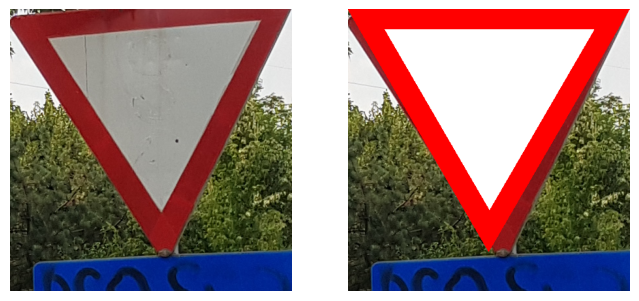

0.8933567303863003


In [79]:
img = test_img.copy()

point_to_show = 0
print(current_chunk.top_left_point.x, current_chunk.top_left_point.y)

chunk_x = current_chunk.top_left_point.x
chunk_y = current_chunk.top_left_point.y + int((current_chunk.top_right_point.y - current_chunk.top_left_point.y)/2)
chunk_len = current_chunk.side_length
chunk_height = current_chunk.height_length
print(chunk_height)

computed_score = check_for_sign(test_img, chunk_x, chunk_y, chunk_len, chunk_height )
print(computed_score)

# plt.plot(current_chunk.top_right_point.x, current_chunk.top_right_point.y, 'bo', markersize=2)

# plt.imshow(img)
# plt.show()
